# Lowtran Test 1
2022-05-13 H. Akitaya

In [1]:
import lowtran

import numpy as np

Set parameters. Ref. TransmittanceGround2Space.py

In [2]:
c1 = {
    "model": 5,  # Subarctic winter.
    "h1": 0.0,  # Observer altitude. [km]
    "angle": 0.0,  # Zentih angle. [deg]
    "wlshort": 200.0,  # Shortest wavelength. [nm]
    "wllong": 25000.0,  # Longest wavelength. [nm]
    "wlstep": 10.0,  # Wavelength step. [nm]
}

In [3]:
TR = lowtran.transmittance(c1)

In [4]:
TR

<xarray.Dataset>
Dimensions:        (wavelength_nm: 4961, angle_deg: 1, time: 1)
Coordinates:
  * wavelength_nm  (wavelength_nm) float32 2.5e+04 2.439e+04 ... 200.0 200.0
  * angle_deg      (angle_deg) float64 0.0
  * time           (time) object None
Data variables:
    transmission   (time, wavelength_nm, angle_deg) float32 0.00745 ... 1.231...
    radiance       (time, wavelength_nm, angle_deg) float32 0.0 0.0 ... 0.0 0.0
    irradiance     (time, wavelength_nm, angle_deg) float32 4.592e-41 ... 4.5...
    pathscatter    (time, wavelength_nm, angle_deg) float32 -99.0 ... -99.0

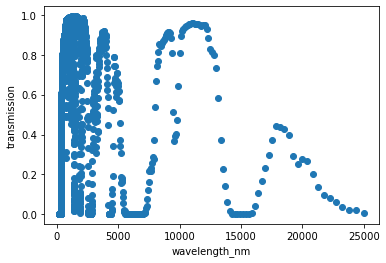

In [5]:
TR.plot.scatter(x="wavelength_nm", y="transmission")

## xarray inspection.

xarray.Datasetについてすこし調べる.
https://docs.xarray.dev/en/stable/getting-started-guide/quick-overview.html

値の取り出し方がややこしくて分かりにくい。。。

In [6]:
TR['wavelength_nm']

<xarray.DataArray 'wavelength_nm' (wavelength_nm: 4961)>
array([25000.     , 24390.244  , 23809.525  , ...,   200.08003,   200.04001,
         200.     ], dtype=float32)
Coordinates:
  * wavelength_nm  (wavelength_nm) float32 2.5e+04 2.439e+04 ... 200.0 200.0

In [7]:
TR.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:        (wavelength_nm: 4961, angle_deg: 1, time: 1)
Coordinates:
  * wavelength_nm  (wavelength_nm) float32 2.5e+04 2.439e+04 ... 200.0 200.0
  * angle_deg      (angle_deg) float64 0.0
  * time           (time) object None
Data variables:
    transmission   (time, wavelength_nm, angle_deg) float32 0.00745 ... 1.231...
    radiance       (time, wavelength_nm, angle_deg) float32 0.0 0.0 ... 0.0 0.0
    irradiance     (time, wavelength_nm, angle_deg) float32 4.592e-41 ... 4.5...
    pathscatter    (time, wavelength_nm, angle_deg) float32 -99.0 ... -99.0>

In [8]:
TR.dims

Frozen({'wavelength_nm': 4961, 'angle_deg': 1, 'time': 1})

In [9]:
TR.coords

Coordinates:
  * wavelength_nm  (wavelength_nm) float32 2.5e+04 2.439e+04 ... 200.0 200.0
  * angle_deg      (angle_deg) float64 0.0
  * time           (time) object None

In [10]:
TR.attrs

{}

In [11]:
TR.data_vars

Data variables:
    transmission  (time, wavelength_nm, angle_deg) float32 0.00745 ... 1.231e-40
    radiance      (time, wavelength_nm, angle_deg) float32 0.0 0.0 ... 0.0 0.0
    irradiance    (time, wavelength_nm, angle_deg) float32 4.592e-41 ... 4.59...
    pathscatter   (time, wavelength_nm, angle_deg) float32 -99.0 -99.0 ... -99.0

In [12]:
TR.sel()

<xarray.Dataset>
Dimensions:        (wavelength_nm: 4961, angle_deg: 1, time: 1)
Coordinates:
  * wavelength_nm  (wavelength_nm) float32 2.5e+04 2.439e+04 ... 200.0 200.0
  * angle_deg      (angle_deg) float64 0.0
  * time           (time) object None
Data variables:
    transmission   (time, wavelength_nm, angle_deg) float32 0.00745 ... 1.231...
    radiance       (time, wavelength_nm, angle_deg) float32 0.0 0.0 ... 0.0 0.0
    irradiance     (time, wavelength_nm, angle_deg) float32 4.592e-41 ... 4.5...
    pathscatter    (time, wavelength_nm, angle_deg) float32 -99.0 ... -99.0

In [13]:
"wavelength_nm" in TR

True

In [14]:
wls = TR.coords["wavelength_nm"].values

In [15]:
wls

array([25000.     , 24390.244  , 23809.525  , ...,   200.08003,
         200.04001,   200.     ], dtype=float32)

In [16]:
trs = TR["transmission"]

In [17]:
trs

<xarray.DataArray 'transmission' (time: 1, wavelength_nm: 4961, angle_deg: 1)>
array([[[7.4500558e-03],
        [2.1344300e-02],
        [2.0898657e-02],
        ...,
        [0.0000000e+00],
        [9.6267101e-34],
        [1.2310687e-40]]], dtype=float32)
Coordinates:
  * wavelength_nm  (wavelength_nm) float32 2.5e+04 2.439e+04 ... 200.0 200.0
  * angle_deg      (angle_deg) float64 0.0
  * time           (time) object None

In [18]:
TR["transmission"]

<xarray.DataArray 'transmission' (time: 1, wavelength_nm: 4961, angle_deg: 1)>
array([[[7.4500558e-03],
        [2.1344300e-02],
        [2.0898657e-02],
        ...,
        [0.0000000e+00],
        [9.6267101e-34],
        [1.2310687e-40]]], dtype=float32)
Coordinates:
  * wavelength_nm  (wavelength_nm) float32 2.5e+04 2.439e+04 ... 200.0 200.0
  * angle_deg      (angle_deg) float64 0.0
  * time           (time) object None

In [19]:
TR.coords.to_dataset()

<xarray.Dataset>
Dimensions:        (wavelength_nm: 4961, angle_deg: 1, time: 1)
Coordinates:
  * wavelength_nm  (wavelength_nm) float32 2.5e+04 2.439e+04 ... 200.0 200.0
  * angle_deg      (angle_deg) float64 0.0
  * time           (time) object None
Data variables:
    *empty*

In [20]:
float(TR.isel(wavelength_nm=1)['wavelength_nm'].values)

24390.244140625

In [21]:
TR.isel(wavelength_nm=1)['transmission'].values[0][0]

0.0213443

In [22]:
TR.sel(wavelength_nm= wls[1])['transmission']

<xarray.DataArray 'transmission' (time: 1, angle_deg: 1)>
array([[0.0213443]], dtype=float32)
Coordinates:
    wavelength_nm  float32 2.439e+04
  * angle_deg      (angle_deg) float64 0.0
  * time           (time) object None

In [23]:
float(TR.sel(wavelength_nm= wls[1])['transmission'].values)

0.021344300359487534

In [24]:
TR.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:        (wavelength_nm: 4961, angle_deg: 1, time: 1)
Coordinates:
  * wavelength_nm  (wavelength_nm) float32 2.5e+04 2.439e+04 ... 200.0 200.0
  * angle_deg      (angle_deg) float64 0.0
  * time           (time) object None
Data variables:
    transmission   (time, wavelength_nm, angle_deg) float32 0.00745 ... 1.231...
    radiance       (time, wavelength_nm, angle_deg) float32 0.0 0.0 ... 0.0 0.0
    irradiance     (time, wavelength_nm, angle_deg) float32 4.592e-41 ... 4.5...
    pathscatter    (time, wavelength_nm, angle_deg) float32 -99.0 ... -99.0>

In [25]:
np.array(TR.where(TR.wavelength_nm > 1)['transmission'])[0]

array([[7.4500558e-03],
       [2.1344300e-02],
       [2.0898657e-02],
       ...,
       [0.0000000e+00],
       [9.6267101e-34],
       [1.2310687e-40]], dtype=float32)

In [26]:
TR.data_vars['transmission'].to_series()

time  wavelength_nm  angle_deg
NaN   25000.000000   0.0          7.450056e-03
      24390.244141   0.0          2.134430e-02
      23809.525391   0.0          2.089866e-02
      23255.814453   0.0          3.398820e-02
      22727.271484   0.0          6.095081e-02
                                      ...     
      200.160126     0.0          1.920538e-31
      200.120071     0.0          3.330101e-36
      200.080032     0.0          0.000000e+00
      200.040009     0.0          9.626710e-34
      200.000000     0.0          1.231069e-40
Name: transmission, Length: 4961, dtype: float32

In [27]:
type(wls)

numpy.ndarray

In [28]:
type(trs)

xarray.core.dataarray.DataArray

In [29]:
TR['transmission'][0, :]

<xarray.DataArray 'transmission' (wavelength_nm: 4961, angle_deg: 1)>
array([[7.4500558e-03],
       [2.1344300e-02],
       [2.0898657e-02],
       ...,
       [0.0000000e+00],
       [9.6267101e-34],
       [1.2310687e-40]], dtype=float32)
Coordinates:
  * wavelength_nm  (wavelength_nm) float32 2.5e+04 2.439e+04 ... 200.0 200.0
  * angle_deg      (angle_deg) float64 0.0
    time           object None

In [30]:
TR['transmission'][0, :].values

array([[7.4500558e-03],
       [2.1344300e-02],
       [2.0898657e-02],
       ...,
       [0.0000000e+00],
       [9.6267101e-34],
       [1.2310687e-40]], dtype=float32)

In [31]:
np.ndarray.flatten(TR['transmission'][0, :].values)

array([7.4500558e-03, 2.1344300e-02, 2.0898657e-02, ..., 0.0000000e+00,
       9.6267101e-34, 1.2310687e-40], dtype=float32)

In [32]:
x = wls

In [33]:
y = np.ndarray.flatten(TR['transmission'][0, :].values)

In [34]:
x.size

4961

In [35]:
y.size

4961

In [36]:
import matplotlib.pyplot as plt

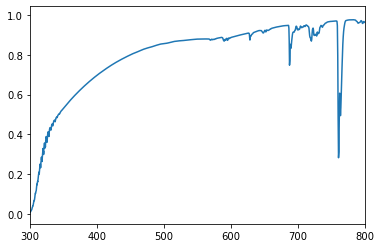

In [37]:
fig, ax = plt.subplots()
ax.set_xlim([300,800])
ax.plot(x, y)
plt.show()

## Plot transmission curve with some altitudes.

In [38]:
c2 = c1

In [39]:
c2

{'model': 5,
 'h1': 0.0,
 'angle': 0.0,
 'wlshort': 200.0,
 'wllong': 25000.0,
 'wlstep': 10.0,
 'itype': 3,
 'iemsct': 0}

In [40]:
c2['wlshort'] = 200.0
c2['wllong'] = 1000.0
c2['wlstep'] = 5.0

In [41]:
alts = [0.0, 0.5, 1.0, 2.0, 4.0, 5.0]  # Altiutudes. [km]
alts.reverse()

In [42]:
trs = []

In [43]:
for alt in alts:
    c2['h1'] = alt
    trs.append(lowtran.transmittance(c2))

In [44]:
wls = trs[0].coords["wavelength_nm"].values

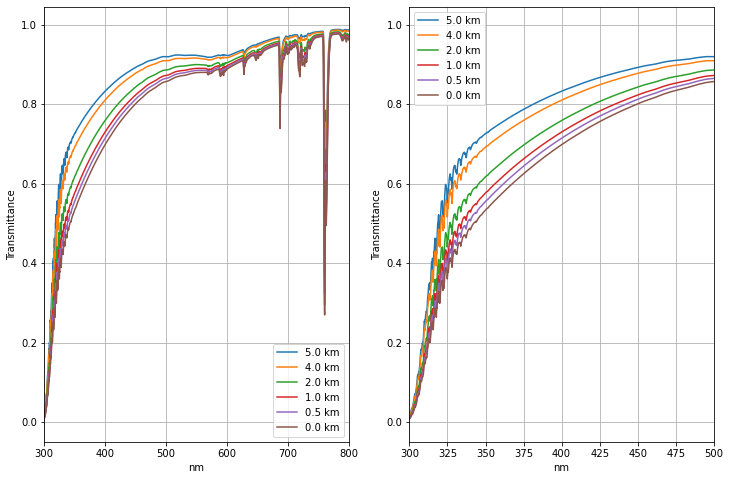

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.set_xlim([300,800])
ax1.grid()
ax1.set_ylabel('Transmittance')
ax1.set_xlabel('nm')
for (alt, tr) in zip(alts, trs):
    ax1.plot(wls, np.ndarray.flatten(tr['transmission'][0, :].values), label='{} km'.format(alt))
ax1.legend()
ax2.set_xlim([300,500])
ax2.grid()
ax2.set_ylabel('Transmittance')
ax2.set_xlabel('nm')
for (alt, tr) in zip(alts, trs):
    ax2.plot(wls, np.ndarray.flatten(tr['transmission'][0, :].values), label='{} km'.format(alt))
ax2.legend()


In [46]:
wls_nuv = [300, 300, 400, 400, 300]
box_nuv = [0.0, 1.0, 1.0, 0.0, 0.0]

In [47]:
import japanize_matplotlib

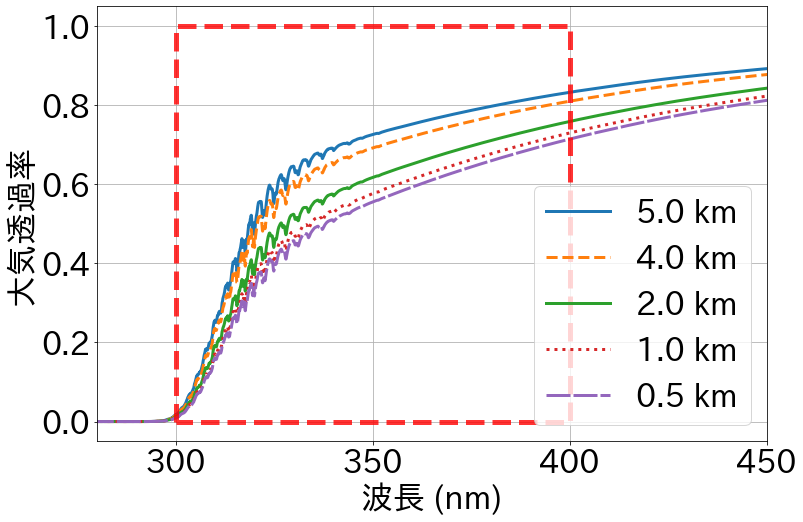

In [48]:
plt.rcParams["font.size"] = 32
fig, (ax2) = plt.subplots(1, 1, figsize=(12,8))
ax2.set_xlim([280,450])
ax2.grid()
ax2.set_ylabel('大気透過率')
ax2.set_xlabel('波長 (nm)')
linestyles = ['-', '--', '-', ':', (0,(8,1))]
for (alt, tr, linestyle) in zip(alts, trs, linestyles):
    ax2.plot(wls, np.ndarray.flatten(tr['transmission'][0, :].values), 
             label='{} km'.format(alt), linewidth=3, linestyle=linestyle)
ax2.plot(wls_nuv, box_nuv, linewidth=5, color='red', linestyle='--', alpha=0.8)
ax2.legend(loc='lower right')
plt.savefig('transmittance_height.png')

In [49]:
from urllib.request import urlopen

In [50]:
wls= []
trs = []

In [51]:
with urlopen("http://hikari.astron.s.u-tokyo.ac.jp/work/SDSS/filters/57mm/9808UB1") as f:
    for line in f:
        decoded_line = line.decode("utf-8")
        wls.append(float(decoded_line.split()[0])/10.0)
        trs.append(float(decoded_line.split()[1]))
wls = np.array(wls)
trs = np.array(trs)